## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Data Understanding
The data we are using comes from the King County housing data set.

In order to better understand data represented in the columns we accessed the King County Assessor website at: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

## Setting up standard imports
The cell below imports standard libraries that will be used for both data exploration, cleaning, and modeling. 

In [2]:
import statsmodels.api as sm
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

## Exploratory Data Analysis

Open csv file.

In [4]:
df = pd.read_csv('./data/cleaned_kc_house_data.csv')

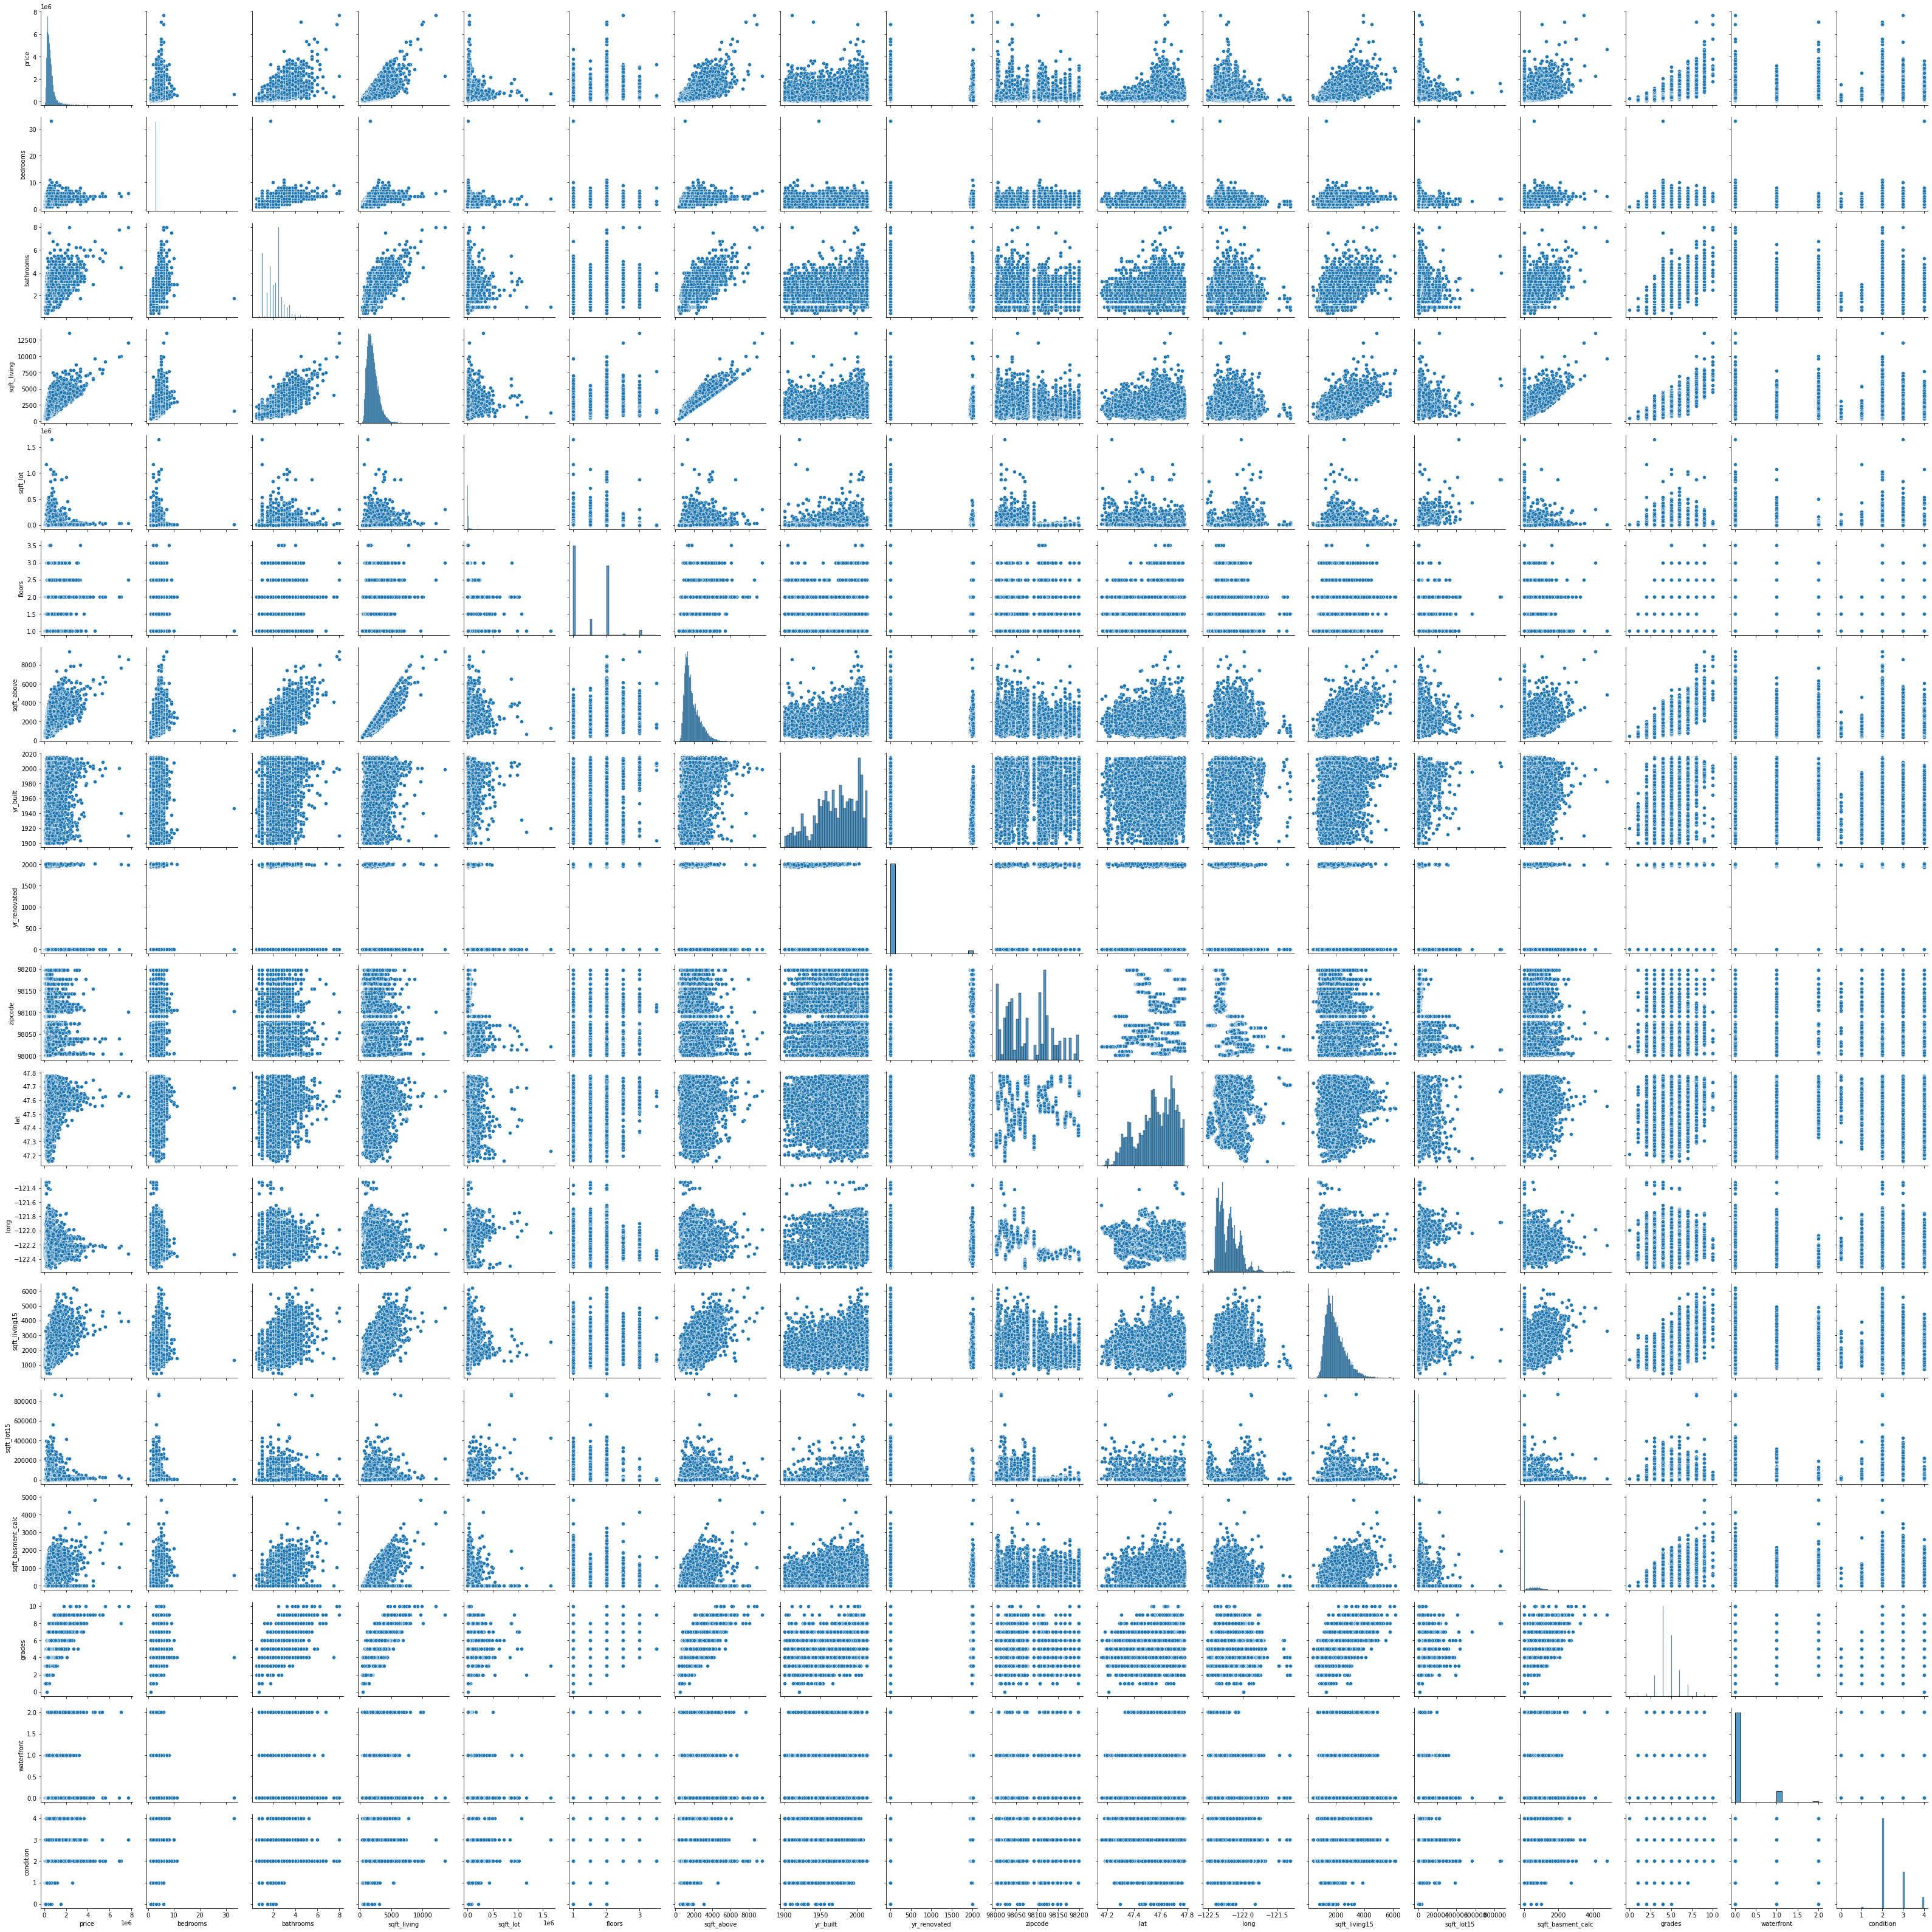

In [5]:
sns.pairplot(df)

Create correlation table. Beginning to look for related features for simple linear regression.

In [6]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basment_calc,grades,waterfront,condition
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.117864,-0.053402,0.306692,0.022036,0.585241,0.082845,0.323799,0.667951,0.114792,0.036056
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.017888,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.302808,0.356563,-0.004970,0.026496
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.047168,-0.204786,0.024280,0.224903,0.569884,0.088303,0.283440,0.665838,0.025747,-0.126479
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.051055,-0.199802,0.052155,0.241214,0.756402,0.184342,0.435130,0.762779,0.043306,-0.059445
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004970,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.015418,0.114731,0.011656,-0.008830
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003786,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.245715,0.458794,0.005347,-0.264075
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.020638,-0.261570,-0.001199,0.344842,0.731767,0.195077,-0.052156,0.756073,0.025175,-0.158904
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.202582,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.133064,0.447865,-0.014982,-0.361592
yr_renovated,0.117864,0.017888,0.047168,0.051055,0.004970,0.003786,0.020638,-0.202582,1.000000,0.062411,0.027985,-0.064557,0.000673,0.004277,0.067297,0.015617,0.042083,-0.055816
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.062411,1.000000,0.266742,-0.564259,-0.279299,-0.147294,0.074725,-0.185771,0.023850,0.002888


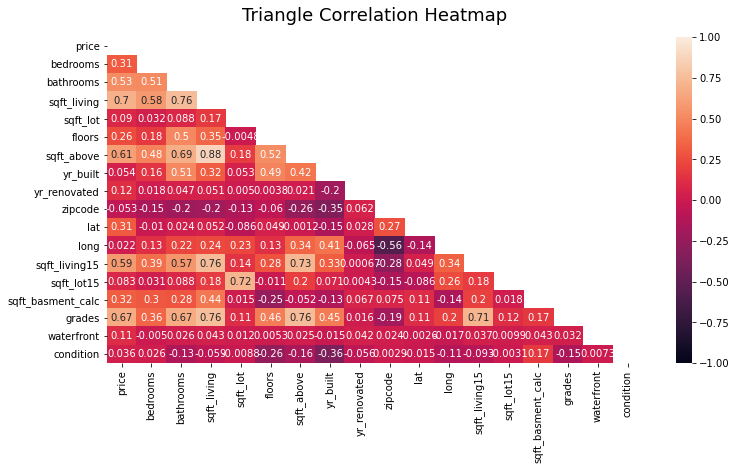

In [8]:
plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot = True);
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

From the heat map it appears that sqft_living seems to have the highest correlation to price. It is also moderately and highly correlated to number bedrooms and bathrooms which could cause issues with multicollinearity. 

## Baseline Linear Regression 
### Price & Square Foot Living 

In [9]:
y = df['price']
x = df['sqft_living']

In [10]:
price_living_results = sm.OLS(y, sm.add_constant(x)).fit()

In [11]:
price_living_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:14:19   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model only explains 49% of variance for sale price of a house. Square feet of living space is a significant feature with a p-value of < 0.05. For every additional livable squarefoot you could expect to see an increase of 280 dollars in sale price. 

As stated before there seem to be some issues with multicollinearity based on the very high Cond. No.

### Exploring Categorical Data

Created histograms to explore categorical data types: waterfront, condition, & grade. 

In [12]:
df.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
sqft_above             int64
yr_built               int64
yr_renovated         float64
zipcode                int64
lat                  float64
long                 float64
sqft_living15          int64
sqft_lot15             int64
sqft_basment_calc      int64
grades               float64
waterfront           float64
condition            float64
dtype: object

In [13]:
df['waterfront'].value_counts()
#0:No, 1:Unknown, 2:Yes

0.0    19075
1.0     2376
2.0      146
Name: waterfront, dtype: int64

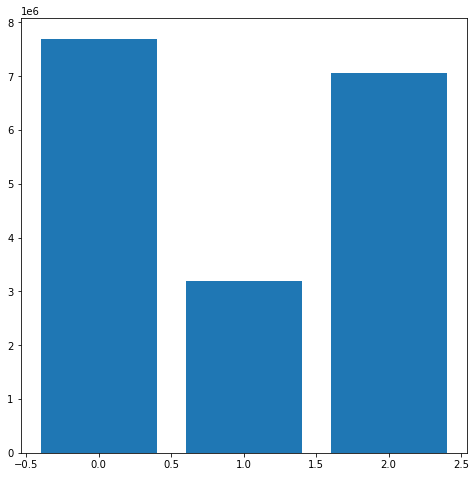

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.bar(x = df['waterfront'], height = df['price']);

In [15]:
df['condition'].value_counts()
#0:worst condition, 4:best condition

2.0    14020
3.0     5677
4.0     1701
1.0      170
0.0       29
Name: condition, dtype: int64

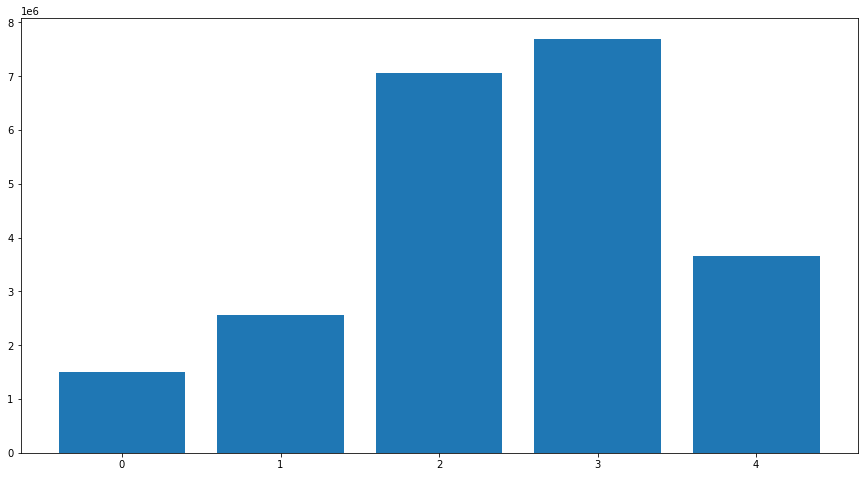

In [16]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x = df['condition'], height = df['price']);

In [18]:
df['grades'].value_counts()
#0:lowest grade, 10:highest grade

4.0     8974
5.0     6065
6.0     2615
3.0     2038
7.0     1134
8.0      399
2.0      242
9.0       89
1.0       27
10.0      13
0.0        1
Name: grades, dtype: int64

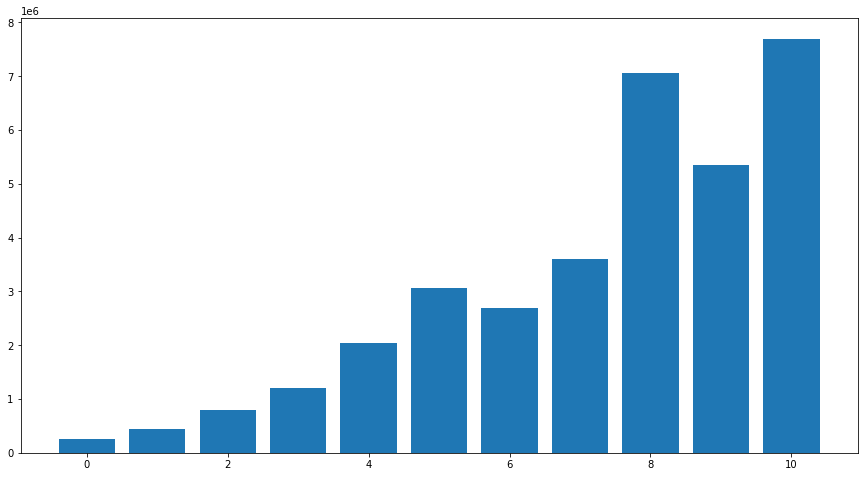

In [19]:
fig, ax = plt.subplots(figsize = (15, 8))

ax.bar(x = df['grades'], height = df['price']);

In [ ]:
y = 

- There does not seem to be that much of a difference in price between No and Yes for waterfront location. 
- There does seems to be an increase in price as the condition increases from 'Poor', but the houses in 'Good' and 'Average' condition have higher sale prices than houses in 'Very Good' condition. 
- The strongest relationship seems to be between price and grade, as price increases from '3 Poor' to '13 Mansion' (though '11 Excellent has higher sale prices than '12 Luxury'



In [20]:
results_grade = sm.OLS(y, sm.add_constant(X)).fit()

NameError: name 'X' is not defined

In [52]:
results_grade.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2338.
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:39:20   Log-Likelihood:            -2.9947e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21586   BIC:                         5.990e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 2.12e+05    4.9e+04      4.327      0.000    1.16e+05    3.08e+05
grade_10 Very Good   8.603e+05   4.96e+04     17.354      0.000    7.63e+05    9.58e+05
grade_11 Excellent   1.286e+06   5.06e+04     25.398      0.000    1.19e+06    1.39e+06
grade_12 Luxury      1.991e+06   5.59e+04     35.586      0.000    1.88e+06     2.1e+06
grade_13 Mansion     3.499e+06   8.59e+04     40.710      0.000    3.33e+06    3.67e+06
grade_3 Poor             5e+04   2.59e+05      0.193      0.847   -4.58e+05    5.58e+05
grade_5 Fair         3.652e+04   5.17e+04      0.707      0.480   -6.47e+04    1.38e+05
grade_6 Low Average  8.991e+04   4.93e+04      1.823      0.068   -6753.343    1.87e+05
grade_7 Average      1.906e+05   4.91e+04      3.884      0.000    9.44e+04    2.87e+05
grade_8 Good          3.31e+05   4.91e+04      6.740      0.000    2.35e+05    4.27e+05
grade_9 Better       5.617e+05   4.92e+04     11.406      0.000    4.65e+05    6.58e+05
==============================================================================
Omnibus:                    15768.954   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792638.204
Skew:                           2.994   Prob(JB):                         0.00
Kurtosis:                      32.068   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model exploring condition and sale price can account for 52% of variance in price. (this is only a 3% increase from just square feet living model.

Statistically signigicant coefficients include grades '7 Average' through '13 Mansion'.
- When compared to a house with a Low Build condition a: 
  - 'Average' house sold for 190K more dollars. 
  - 'Good' house sold for 331K more dollars.
  - 'Better' house sold for 561K more dollars.
  - 'Very good' house sold for 860K more dollars.
  - 'Excellent' house sold for 1.2 million more dollars.
  - 'Luxary' house sold for 1.9 million more dollars.
  - 'Mansion' house sold for 3.5 million more dollars.


## Multiple Linear Regression

### Exploring Multicollinearity

In [22]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_calc
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
zipcode,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [24]:
df_multico = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_multico['pairs'] = list(zip(df_multico.level_0, df_multico.level_1))

df_multico.set_index(['pairs'], inplace = True)

df_multico.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_multico.columns = ['cc']

df_multico.drop_duplicates(inplace=True)

df_multico[(df_multico.cc>.75) & (df_multico.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758


These columns are all highly correlated with one another and could potentially be dropped from future models. 